# import package


In [2]:
import numpy as np

In [ ]:
import numpy

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%config Completer.use_jedi = False

In [6]:
import Corrfunc

In [7]:
import nbodykit

In [8]:
from scipy import integrate
import astropy.units as u
import multiprocessing as mp

# load data

In [96]:
data = np.load('/home/yunzheng/mock/clustering/data/wp_direct/wp_bin_-20.5.npz')

In [88]:
data['rp']

array([1.31131470e-02, 2.07682353e-02, 3.29194690e-02, 5.21772620e-02,
       8.26968265e-02, 1.31015125e-01, 2.07561964e-01, 3.28797056e-01,
       5.20980477e-01, 8.26016399e-01, 1.31042595e+00, 2.07906195e+00,
       3.29710566e+00, 5.22692903e+00, 8.28538583e+00, 1.31341796e+01,
       2.08205763e+01, 3.30059753e+01, 5.23182095e+01])

In [89]:
data['wp']

array([287.60366848, 256.11384643, 225.20216371, 198.57444476,
       173.20715503, 148.42729041, 123.42746692,  97.86483162,
        72.87540422,  51.19487537,  34.99111366,  24.4844029 ,
        17.78805474,  12.88456165,   8.92734564,   5.72254441,
         3.2192074 ,   1.54285573,   0.51167735])

In [8]:
rp = data[:,1]

In [94]:
wp = [[]for _ in range(8)]
rp = [[]for _ in range(8)]
temp = [[]for _ in range(8)]
# rpbin = [[]for _ in range(8)]
for i in range(4):
    temp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_direct/wp_bin_-%s.npz'%(18.5+0.5*i))
    wp[i] = temp[i]['wp'] / (10**(0.15*(4-i)))
#     wp[i] = temp[i]['wp'] 
    rp[i] = temp[i]['rp']
for i in range(4,8):
    temp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_direct/wp_bin_-%s.npz'%(18.5+0.5*i))
#     wp[i] = temp[i]['wp'] 
    wp[i] = temp[i]['wp'] * (10**(0.15*(i - 4)))
    rp[i] = temp[i]['rp']

Text(0.5, 1.0, 'Projected correlation function')

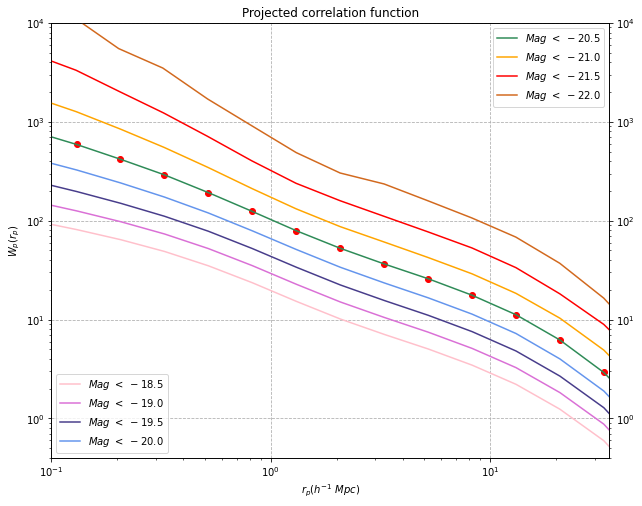

In [97]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red','chocolate']
l = [[]for _ in range(8)]

for i in range(4):
    l[i], = plt.plot(rp[i],wp[i],color = colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[0],l[1],l[2],l[3]],loc = 'lower left')


plt.plot(data['rp'],data['wp'],'ro')
plt.xscale('log')
plt.yscale('log')
plt.grid(axis = 'both', linestyle = '--')
plt.xlim(0.1,35)
plt.ylim(0.4,10**4)
plt.xlabel('$r_p (h^{-1} \ Mpc)$')
plt.ylabel('$W_p (r_{p})$')



ax2 = ax1.twinx()
for i in range(4,8):
    l[i], = plt.plot(rp[i],wp[i],colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[4],l[5],l[6],l[7]],loc = 'upper right')

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.1,35)
plt.ylim(0.4,10**4)
# plt.xlabel('$r_p (h^{-1} \ Mpc)$')
# plt.ylabel('$W_p (r_{p})$')
plt.title('Projected correlation function')
# plt.savefig('/home/yunzheng/mock/clustering/picture/Pcf_bins.pdf',dpi = 100)

In [98]:
wp = [[]for _ in range(8)]
rp = [[]for _ in range(8)]
temp = [[]for _ in range(8)]
# rpbin = [[]for _ in range(8)]
for i in range(4):
    temp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_direct/wp2_bin_-%s.npz'%(18.5+0.5*i))
    wp[i] = temp[i]['wp'] / (10**(0.15*(4-i)))
#     wp[i] = temp[i]['wp'] 
    rp[i] = temp[i]['rp']
for i in range(4,8):
    temp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_direct/wp2_bin_-%s.npz'%(18.5+0.5*i))
#     wp[i] = temp[i]['wp'] 
    wp[i] = temp[i]['wp'] * (10**(0.15*(i - 4)))
    rp[i] = temp[i]['rp']

Text(0.5, 1.0, 'Projected correlation function')

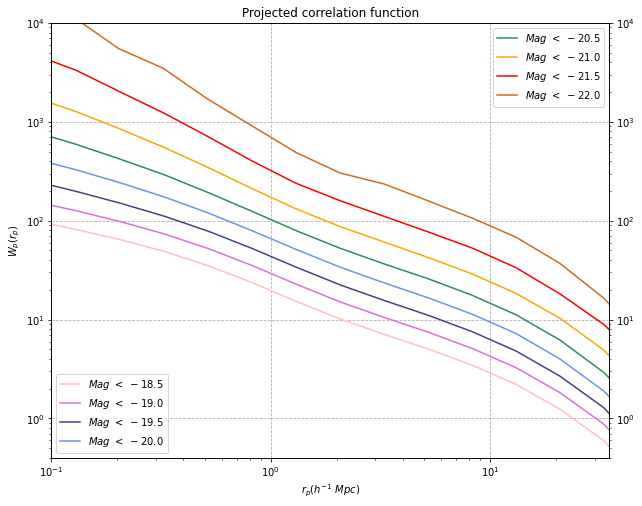

In [99]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red','chocolate']
l = [[]for _ in range(8)]

for i in range(4):
    l[i], = plt.plot(rp[i],wp[i],color = colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[0],l[1],l[2],l[3]],loc = 'lower left')


# plt.plot(data['rp'],data['wp'],'ro')
plt.xscale('log')
plt.yscale('log')
plt.grid(axis = 'both', linestyle = '--')
plt.xlim(0.1,35)
plt.ylim(0.4,10**4)
plt.xlabel('$r_p (h^{-1} \ Mpc)$')
plt.ylabel('$W_p (r_{p})$')



ax2 = ax1.twinx()
for i in range(4,8):
    l[i], = plt.plot(rp[i],wp[i],colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[4],l[5],l[6],l[7]],loc = 'upper right')

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.1,35)
plt.ylim(0.4,10**4)
# plt.xlabel('$r_p (h^{-1} \ Mpc)$')
# plt.ylabel('$W_p (r_{p})$')
plt.title('Projected correlation function')
# plt.savefig('/home/yunzheng/mock/clustering/picture/Pcf_bins.pdf',dpi = 100)

# wp_color

## check blue or red galaxies

In [124]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new_withcolor.npz')
print(table.files)
vpeak = table['vpeak']
posx = table['posx'] / 1000
posy = table['posy'] / 1000
posz = table['posz'] / 1000

color = table['color']
mag = table['mag']
zform = table['zform']
print('Load Sucessfully!')

['subid', 'vpeak', 'posx', 'posy', 'posz', 'vx', 'vy', 'vz', 'zform', 'mag', 'color']
Load Sucessfully!


In [125]:
zform

array([0.25344051, 0.28906294, 0.44355603, ..., 0.95362194, 2.18064083,
       0.86360329])

In [126]:
color

array([-0.71317044, -0.67961998, -0.51425548, ..., -1.61803398,
        5.2360679 , -1.61803398])

In [127]:
mag

array([-15.19880718, -15.20075222, -15.19876185, ..., -23.18694452,
       -23.07630745, -23.11460951])

In [128]:
posx

array([184.55509375, 468.45490625, 421.268     , ..., 106.277625  ,
        81.29776562, 345.92540625])

In [129]:
posy

array([352.93053125, 264.3983125 , 594.4025    , ...,  73.42900781,
       282.002375  , 576.20425   ])

In [130]:
posz

array([367.47328125, 465.73025   ,  95.92614063, ..., 473.01690625,
       304.09653125, 563.9169375 ])

In [101]:

aa=np.linspace(-2.,1.8,20)
bins = 10.**aa

In [131]:
i = -21
temp = (mag < i) & (mag > i-1)
mag_bin = mag[temp]
print("The length of this mag bin is ",len(mag_bin))
print("The maximum mag is",(np.max(mag_bin)))
print("The minimum mag is",(np.min(mag_bin)))

x_bin = posx[temp]
y_bin = posy[temp]
z_bin = posz[temp]

The length of this mag bin is  364475
The maximum mag is -21.000000223496002
The minimum mag is -21.999991052036556


In [132]:
color_bin = color[temp]
print("The length of color is:",len(color_bin))
color_cut = 0.21 - 0.03 * mag_bin

The length of color is: 364475


In [40]:
np.min(color_bin)

0.17837796527294436

In [42]:
np.where(color_bin == np.max(color_bin))

(array([103301, 107892, 108622, 140306, 151243, 160428, 172144, 173851,
        177063, 179603, 180757, 190335, 201835, 201915, 202169, 204044,
        205758, 207090, 208384, 209237, 211123, 221282, 222214, 230536,
        233163, 244218, 245237, 254157, 257528, 266078, 274565, 278838,
        280982, 287604, 290271, 297328, 297909, 302471, 307186, 308194,
        320715, 332873, 353778, 357782]),)

In [43]:
redtemp = color_bin > color_cut
print(len(redtemp))

364475


In [50]:
redtemp

array([ True, False, False, ..., False, False, False])

In [52]:
newbluetemp = (1-redtemp).astype(bool)

In [58]:
newbluetemp

array([False,  True,  True, ...,  True,  True,  True])

In [45]:
color_bin[redtemp].shape

(210537,)

In [64]:
x_bin

array([173.8805625 , 294.854625  , 495.92590625, ..., 162.31235937,
       332.69971875, 180.75321875])

In [63]:
x_bin[redtemp]

array([173.8805625 , 276.802875  ,  11.72563086, ..., 291.114875  ,
       466.70228125, 254.87428125])

In [62]:
x_bin[newbluetemp]

array([294.854625  , 495.92590625, 282.99403125, ..., 162.31235937,
       332.69971875, 180.75321875])

In [48]:
bluetemp = color_bin < color_cut
print(len(bluetemp))
print(color_bin[bluetemp].shape)

364475
(153938,)


In [133]:
from Corrfunc.theory.wp import wp
results = wp(boxsize = 600,pimax=60,nthreads = 30,binfile = bins,X = x_bin,Y = y_bin,Z = z_bin,output_rpavg=True)

In [134]:
results['rpavg']

array([1.29733165e-02, 2.03600694e-02, 3.24035942e-02, 5.15022083e-02,
       8.17065054e-02, 1.29880556e-01, 2.05945256e-01, 3.26487397e-01,
       5.18221482e-01, 8.22163965e-01, 1.30617122e+00, 2.07329751e+00,
       3.29197135e+00, 5.21970009e+00, 8.27596047e+00, 1.31226676e+01,
       2.08064364e+01, 3.29920821e+01, 5.23045647e+01])

In [135]:
results['wp']

array([5.39158218e+03, 3.63876066e+03, 2.28572566e+03, 1.50776348e+03,
       1.04499913e+03, 7.28578255e+02, 4.97810509e+02, 3.31466919e+02,
       2.15194862e+02, 1.36681605e+02, 8.77400907e+01, 5.85792915e+01,
       4.08684983e+01, 2.84574295e+01, 1.95019896e+01, 1.23734425e+01,
       6.96230013e+00, 3.31850855e+00, 1.19028694e+00])

In [13]:
wp = [[] for _ in range(3)]
red_wp = [[] for _ in range(3)]
blue_wp = [[] for _ in range(3)]
for i in range(3):
    wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp_total_%s.npy.npz'%(19+i))
    red_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp_red_%s.npy.npz'%(19+i))
    blue_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp_blue_%s.npy.npz'%(19+i))

In [8]:
wp[0].files

['wp', 'rp']

In [18]:
wp[0]['wp']

array([1.27404873e+06, 8.02558895e+05, 5.07086167e+05, 3.18534895e+05,
       2.01533213e+05, 1.27043847e+05, 8.00609610e+04, 5.04522103e+04,
       3.17704466e+04, 1.99882908e+04, 1.25564351e+04, 7.87107852e+03,
       4.91847321e+03, 3.05568934e+03, 1.88140296e+03, 1.14084543e+03,
       6.74259500e+02, 3.80008131e+02, 1.95164016e+02])

In [96]:
wp[2]['wp']

array([1.34153481e+06, 8.43436612e+05, 5.20194854e+05, 3.21148441e+05,
       2.01892727e+05, 1.27985261e+05, 8.04957004e+04, 5.07727779e+04,
       3.20021830e+04, 2.00969619e+04, 1.26220145e+04, 7.90800158e+03,
       4.93936720e+03, 3.06867258e+03, 1.88830506e+03, 1.14495349e+03,
       6.76431266e+02, 3.80767200e+02, 1.95008526e+02])

In [97]:
red_wp[2]['wp']

array([1.34522436e+06, 8.44698646e+05, 5.21581449e+05, 3.21367872e+05,
       2.02790296e+05, 1.28071466e+05, 8.08072228e+04, 5.09284368e+04,
       3.20933742e+04, 2.01667424e+04, 1.26526643e+04, 7.92472794e+03,
       4.94734458e+03, 3.07254868e+03, 1.89043019e+03, 1.14614810e+03,
       6.76968490e+02, 3.80910871e+02, 1.95044139e+02])

In [98]:
blue_wp[2]['wp']

array([1.32904664e+06, 8.39946008e+05, 5.17926604e+05, 3.20952277e+05,
       2.01201925e+05, 1.27610862e+05, 8.00550727e+04, 5.05455903e+04,
       3.18724612e+04, 2.00423022e+04, 1.25723726e+04, 7.88428087e+03,
       4.92981990e+03, 3.06437563e+03, 1.88582846e+03, 1.14344110e+03,
       6.75782982e+02, 3.80569688e+02, 1.94960411e+02])

In [14]:
rp = red_wp[1]['rp']

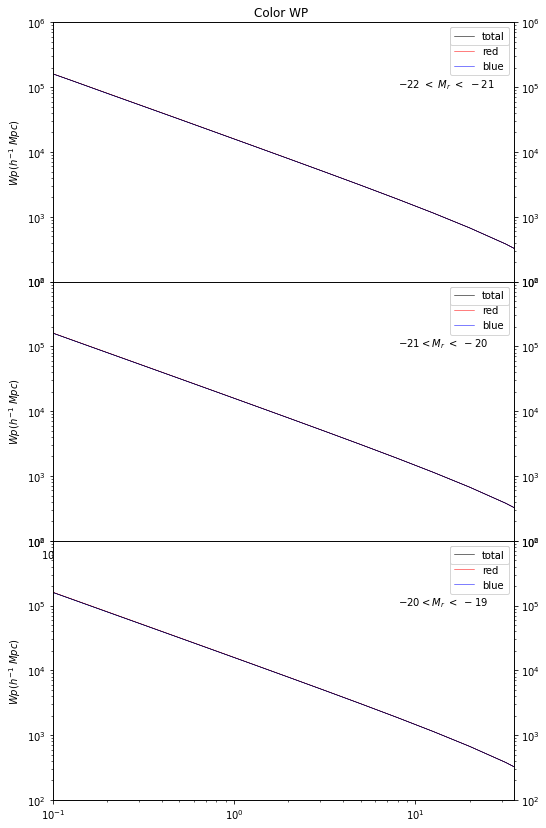

In [102]:
fig2 = plt.figure(figsize=(8,12))
# ax1 = fig2.add_subplot(111)
frame1 = fig2.add_axes((.1,.65,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax1 = plt.gca()

plt.plot(rp,wp[2]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[2]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[2]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100000,'$ -22\  <\  M_{r} \ < \ -21$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.legend()

plt.title(r'Color WP ')
plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')
frame1.set_xticklabels([])
frame1.set_yticklabels([])
plt.xscale('log')
plt.yscale('log')
ax2 = ax1.twinx()
plt.plot(rp,wp[2]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.xscale('log')
plt.yscale('log')

plt.legend()

frame2 = fig2.add_axes((.1,.35,.8,.3))
ax1 = plt.gca()

plt.plot(rp,wp[1]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[1]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[1]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100000,'$ -21 < M_{r} \ < \ -20$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.legend()

plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')
frame1.set_xticklabels([])

plt.xscale('log')
plt.yscale('log')
ax2 = ax1.twinx()
plt.plot(rp,wp[1]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.xscale('log')
plt.yscale('log')
plt.legend()

frame3 = fig2.add_axes((.1,.05,.8,.3))
ax1 = plt.gca()

plt.plot(rp,wp[0]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[0]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[0]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100000,'$ -20 < M_{r} \ < \ -19$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.legend()
# plt.title(r'Color WP ')
plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')
frame1.set_xticklabels([])

# ax2 = ax.twinx()
plt.xscale('log')
plt.yscale('log')

ax2 = ax1.twinx()
plt.plot(rp,wp[0]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(100,1000000)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# plt.savefig('/home/yunzheng/mock/clustering/picture/colorwp.pdf',dpi = 100)

In [136]:
wp = [[] for _ in range(3)]
red_wp = [[] for _ in range(3)]
blue_wp = [[] for _ in range(3)]
for i in range(3):
    
    wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp3_total_-%s.npz'%(19+i))
    red_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp3_red_-%s.npz'%(19+i))
    blue_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp3_blue_-%s.npz'%(19+i))

In [140]:
wp[0].files

['rp', 'wp']

In [138]:
rp = red_wp[1]['rp']

In [139]:
rp

array([1.30910316e-02, 2.05525944e-02, 3.28585325e-02, 5.21904493e-02,
       8.27728871e-02, 1.30951094e-01, 2.07191122e-01, 3.27786332e-01,
       5.18850054e-01, 8.21804308e-01, 1.30435858e+00, 2.07249756e+00,
       3.29125426e+00, 5.22106510e+00, 8.27719816e+00, 1.31242457e+01,
       2.08087719e+01, 3.29936027e+01, 5.23047829e+01])

In [5]:
rp

array([1.25892541e-02, 1.99526231e-02, 3.16227766e-02, 5.01187234e-02,
       7.94328235e-02, 1.25892541e-01, 1.99526231e-01, 3.16227766e-01,
       5.01187234e-01, 7.94328235e-01, 1.25892541e+00, 1.99526231e+00,
       3.16227766e+00, 5.01187234e+00, 7.94328235e+00, 1.25892541e+01,
       1.99526231e+01, 3.16227766e+01, 5.01187234e+01])

In [141]:
wp[2]['rp']

array([1.29733165e-02, 2.03600694e-02, 3.24035942e-02, 5.15022083e-02,
       8.17065054e-02, 1.29880556e-01, 2.05945256e-01, 3.26487397e-01,
       5.18221482e-01, 8.22163965e-01, 1.30617122e+00, 2.07329751e+00,
       3.29197135e+00, 5.21970009e+00, 8.27596047e+00, 1.31226676e+01,
       2.08064364e+01, 3.29920821e+01, 5.23045647e+01])

In [145]:
wp[1]['wp']

array([1.40883966e+03, 1.04059481e+03, 7.15356650e+02, 5.48788159e+02,
       4.29776072e+02, 3.36847518e+02, 2.62589025e+02, 2.00723832e+02,
       1.46820495e+02, 1.00716705e+02, 6.64765421e+01, 4.40449497e+01,
       3.05064512e+01, 2.16455339e+01, 1.48168848e+01, 9.45008199e+00,
       5.20368383e+00, 2.45734600e+00, 8.30369530e-01])

In [143]:
red_wp[0]['wp']

array([897.52083475, 790.99762315, 712.25616868, 656.57401492,
       589.57614888, 525.39139135, 439.60882434, 338.65245789,
       235.49499747, 149.15912605,  88.87407379,  54.86000681,
        36.92836101,  25.92021618,  17.59638055,  11.30313726,
         6.39546998,   3.06925121,   0.98313127])

In [144]:
red_wp[1]['wp']

array([1.17654884e+03, 9.45130588e+02, 6.92678634e+02, 6.13113900e+02,
       5.23949956e+02, 4.53104941e+02, 3.80481903e+02, 3.00046611e+02,
       2.17873988e+02, 1.43951405e+02, 8.91758234e+01, 5.57354123e+01,
       3.72244510e+01, 2.61382326e+01, 1.78699797e+01, 1.14018621e+01,
       6.31918447e+00, 2.97918911e+00, 9.58135295e-01])

In [146]:
blue_wp[1]['wp']

array([1.62975234e+03, 1.22808621e+03, 7.41973220e+02, 5.28980865e+02,
       3.73035109e+02, 2.69886222e+02, 1.89251288e+02, 1.35589761e+02,
       9.95741184e+01, 7.07144764e+01, 4.99335650e+01, 3.52430893e+01,
       2.52935251e+01, 1.80181581e+01, 1.23561654e+01, 7.76551583e+00,
       4.26579252e+00, 2.01114588e+00, 7.14724331e-01])

In [15]:
blue_wp[0]['wp']

array([1.27004638e+06, 7.99456608e+05, 5.05299748e+05, 3.17546825e+05,
       2.00870437e+05, 1.26617284e+05, 7.97871602e+04, 5.03018659e+04,
       3.16761020e+04, 1.99350631e+04, 1.25275782e+04, 7.85514713e+03,
       4.90962220e+03, 3.05067358e+03, 1.87886212e+03, 1.13962926e+03,
       6.73719172e+02, 3.79870472e+02, 1.95136002e+02])

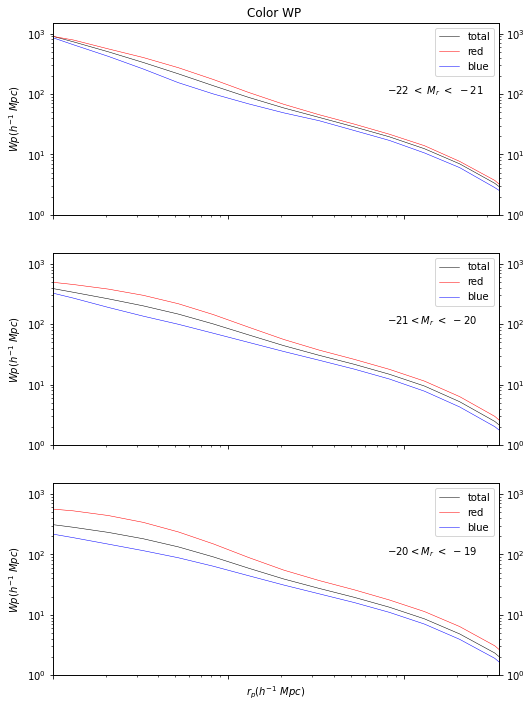

In [150]:
fig2 = plt.figure(figsize=(8,12))
# ax1 = fig2.add_subplot(111)
ax1 = plt.subplot(311)
# frame1 = fig2.add_axes((.1,.64,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
# ax1 = plt.gca()

plt.plot(rp,wp[2]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[2]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[2]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100,'$ -22\  <\  M_{r} \ < \ -21$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.legend()
# frame1.set_xticklabels([])
# frame1.set_yticklabels([])
plt.title(r'Color WP ')
plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')

plt.xscale('log')
plt.yscale('log')
ax2 = ax1.twinx()
# plt.plot(rp,wp[2]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.xscale('log')
plt.yscale('log')
plt.setp(ax1.get_xticklabels(), visible=False)

# plt.legend()

ax3 = plt.subplot(312)

plt.plot(rp,wp[1]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[1]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[1]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100,'$ -21 < M_{r} \ < \ -20$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.legend()

plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')
# frame2.set_xticklabels([])
# frame2.set_yticklabels([])
plt.xscale('log')
plt.yscale('log')
ax4 = ax3.twinx()
# plt.plot(rp,wp[1]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.setp(ax3.get_xticklabels(), visible=False)


ax5 = plt.subplot(313)

plt.plot(rp,wp[0]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.plot(rp,red_wp[0]['wp'],label = 'red',color = 'red',linewidth = 0.5)
plt.plot(rp,blue_wp[0]['wp'],label = 'blue',color = 'blue',linewidth = 0.5)
plt.text(8,100,'$ -20 < M_{r} \ < \ -19$',fontsize = 10)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.legend()
# plt.title(r'Color WP ')
plt.xlabel('$r_{p} (h^{-1} \ Mpc)$')
plt.ylabel(r'$Wp(h^{-1} \ Mpc)$')
# frame3.set_xticklabels([])

# ax2 = ax.twinx()
plt.xscale('log')
plt.yscale('log')

ax6 = ax5.twinx()
# plt.plot(rp,wp[0]['wp'],label = 'total',color = 'k',linewidth = 0.5)
plt.xlim(0.1,35)
plt.ylim(1,1500)
plt.xscale('log')
plt.yscale('log')
plt.setp(ax5.get_xticklabels(), visible=False)
# plt.legend()
plt.savefig('/home/yunzheng/mock/clustering/picture/colorwp.pdf',dpi = 100)

# $\xi(s)$

In [45]:
import os

In [50]:
xi = [[] for _ in range(7)]
xi_mo = [[] for _ in range(7)]

path = "/home/yunzheng/mock/clustering/data/xi/xi_circle/"
# files= os.listdir(path)
# s = []
# for file in files: #遍历文件夹
#     if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
#         f = open(path+"/"+file)#打开文件
#         iter_f = iter(f) #创建迭代器
#         str = ""
#         for line in iter_f: #遍历文件，一行行遍历，读取文本
#             str = str + line
#             s.append(str) #每个文件的文本存到list中
#             print(s) 


for i in range(7):

    xi[i] = np.load('/home/yunzheng/mock/clustering/data/xi/xi_circle/xi_%s.npz'%(18.5+i*0.5))
    xi_mo[i] = np.load('/home/yunzheng/mock/clustering/data/xi/xi_circle/ximonopole_%s.npz'%(18.5+i*0.5))
    
#     blue_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp_blue_%s.npy.npz'%(19+i))

In [51]:
xi[0].files

['s', 'xi']

In [47]:
xi[0]['xi2d'][900:1000]

array([         nan,          nan,   1.        ,          nan,
       101.        , 201.        ,  34.33333333,          nan,
                nan, 301.        ,          nan, 101.        ,
                nan,   1.        ,          nan,          nan,
       101.        ,          nan,  51.        ,   1.        ,
       101.        , 101.        ,          nan,          nan,
        -9.        , 401.        ,          nan, 101.        ,
                nan,          nan,          nan,  51.        ,
       101.        ,   1.        ,          nan,          nan,
       101.        ,          nan,          nan,          nan,
                nan, 201.        ,          nan, 101.        ,
                nan,          nan,          nan,          nan,
         1.        , 201.        , 401.        , 201.        ,
         1.        , 301.        , 101.        ,          nan,
         1.        ,          nan,          nan, 191.        ,
                nan, 101.        ,          nan,       

In [48]:
xi[0]['xi_cor'][900:1000]

array([         nan,          nan,   1.        ,          nan,
       101.        , 201.        ,  34.33333333,          nan,
                nan, 301.        ,          nan, 101.        ,
                nan,   1.        ,          nan,          nan,
       101.        ,          nan,  51.        ,   1.        ,
       101.        , 101.        ,          nan,          nan,
        -9.        , 401.        ,          nan, 101.        ,
                nan,          nan,          nan,  51.        ,
       101.        ,   1.        ,          nan,          nan,
       101.        ,          nan,          nan,          nan,
                nan, 201.        ,          nan, 101.        ,
                nan,          nan,          nan,          nan,
         1.        , 201.        , 401.        , 201.        ,
         1.        , 301.        , 101.        ,          nan,
         1.        ,          nan,          nan, 191.        ,
                nan, 101.        ,          nan,       

In [49]:
xi_mo[0].files

['s', 'xi0', 'xi0_cor']

In [39]:
xi_mo[0] = np.load('/home/yunzheng/mock/clustering/data/xi/xi_circle/ximonopole_21.5.npz')

In [40]:
xi_mo[0].files

['s', 'xi0']

In [52]:
xi_mo[0]['s']

array([1.35628223e-03, 2.28688873e-03, 2.99452938e-03, 4.79394226e-03,
       4.17931720e-03, 7.35810612e-03, 8.69134813e-03, 1.09141852e-02,
       1.48160686e-02, 1.96368774e-02, 2.14453498e-02, 2.51772406e-02,
       2.87279164e-02, 3.23968000e-02, 3.60671378e-02, 3.90647338e-02,
       4.29766661e-02, 4.69900648e-02, 5.13356385e-02, 5.61748344e-02,
       6.13481006e-02, 6.70621503e-02, 7.32011903e-02, 7.99177867e-02,
       8.72931920e-02, 9.53873343e-02, 1.04312583e-01, 1.13788122e-01,
       1.24379293e-01, 1.35855010e-01, 1.48403411e-01, 1.62201274e-01,
       1.77134399e-01, 1.93533669e-01, 2.11458207e-01, 2.30877368e-01,
       2.52264972e-01, 2.75580571e-01, 3.00934926e-01, 3.28804045e-01,
       3.59208157e-01, 3.92375752e-01, 4.28672977e-01, 4.68249000e-01,
       5.11468229e-01, 5.58771806e-01, 6.10424332e-01, 6.66777833e-01,
       7.28409149e-01, 7.95693530e-01, 8.69243595e-01, 9.49599282e-01,
       1.03733842e+00, 1.13311835e+00, 1.23788530e+00, 1.35230056e+00,
      

In [53]:
xi_mo[0]['xi0']

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 94.97365176, 73.77624431, 73.02537919, 66.33778455,
       68.19302739, 55.95293182, 51.86453945, 50.37938462, 44.41592955,
       41.54239139, 40.59326371, 38.08153024, 36.94574077, 33.26931112,
       30.64158149, 28.68148117, 27.08027811, 25.61455948, 23.92530487,
       22.27707619, 20.7337266 , 19.50419081, 18.26428937, 16.89233084,
       15.8732537 , 14.92941813, 13.86435657, 12.8732948 , 11.98607937,
       11.20632889, 10.42526614,  9.70079439,  8.95981893,  8.30249481,
        7.7049752 ,  7.10955211,  6.54880204,  6.03108383,  5.54837218,
        5.10660935,  4.68006292,  4.29806731,  3.94053459,  3.61391173,
        3.30908914,  3.03758892,  2.78431701,  2.5514024 ,  2.33762553,
        2.13901884,  1.95713094,  1.78762074,  1.63141236,  1.48

In [21]:
xi_mo[4]['xi0_cor']

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 1.07663810e+02,            nan,
       7.18029978e+01, 6.71439570e+01, 6.58982221e+01, 5.67805731e+01,
       5.42458365e+01, 4.43795419e+01, 3.99370178e+01, 3.71550689e+01,
       3.25415105e+01, 2.85929951e+01, 2.55265817e+01, 2.37976078e+01,
       2.12514885e+01, 1.97654765e+01, 1.73058175e+01, 1.60487023e+01,
       1.47028125e+01, 1.31716151e+01, 1.17805975e+01, 1.07241224e+01,
      

(0.1, 35)

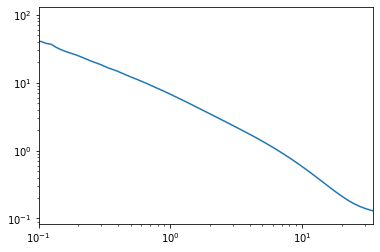

In [54]:
# plt.plot(xi_mo[3]['s'],xi_mo[3]['xi0_cor'])
plt.plot(xi_mo[0]['s'],xi_mo[0]['xi0'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,35)

In [10]:
10**0.15

1.4125375446227544

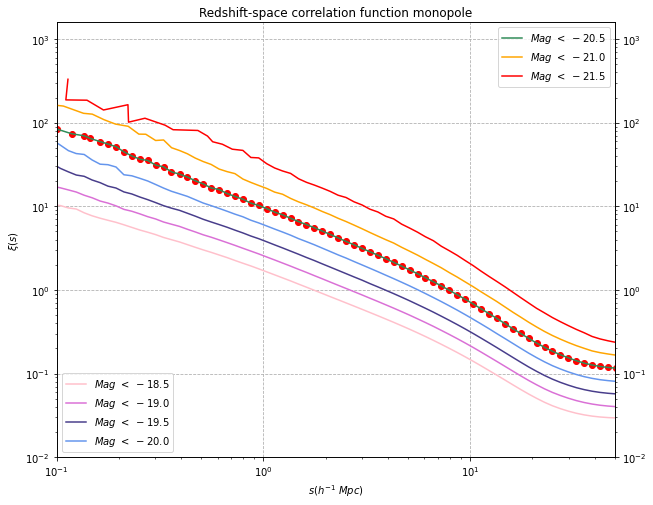

In [59]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)


# colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red','chocolate']
colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red']
l = [[]for _ in range(7)]

for i in range(4):
    y = xi_mo[i]['xi0'] /  (10**(0.15*(4-i)))
    l[i], = plt.plot(xi_mo[i]['s'],y,color = colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[0],l[1],l[2],l[3]],loc = 'lower left')


plt.plot(xi_mo[4]['s'],xi_mo[4]['xi0'],'ro')
plt.xscale('log')
plt.yscale('log')
plt.grid(axis = 'both', linestyle = '--')
plt.xlim(0.1,50)
plt.ylim(0.01,10**3.2)
plt.xlabel('$s (h^{-1} \ Mpc)$')
plt.ylabel(r'$\xi(s)$')



ax2 = ax1.twinx()
for i in range(4,7):
    y = xi_mo[i]['xi0'] * (10**(0.15*(i - 4)))
    l[i], = plt.plot(xi_mo[i]['s'],y,colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[4],l[5],l[6]],loc = 'upper right')

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.1,50)
plt.ylim(0.01,10**3.2)
# plt.xlabel('$r_p (h^{-1} \ Mpc)$')
# plt.ylabel('$W_p (r_{p})$')
plt.title('Redshift-space correlation function monopole')
# plt.savefig('/home/yunzheng/mock/clustering/picture/ximomopole.pdf',dpi = 100)

# data check

## data download

In [30]:

xi = [[] for _ in range(7)]
xi_mo = [[] for _ in range(7)]

path = "/home/yunzheng/mock/clustering/data/xis_direct/"
# files= os.listdir(path)
# s = []
# for file in files: #遍历文件夹
#     if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
#         f = open(path+"/"+file)#打开文件
#         iter_f = iter(f) #创建迭代器
#         str = ""
#         for line in iter_f: #遍历文件，一行行遍历，读取文本
#             str = str + line
#             s.append(str) #每个文件的文本存到list中
#             print(s) 


for i in range(7):

    xi[i] = np.load(path+"xi_%s.npz"%(18.5+i*0.5))
    xi_mo[i] = np.load(path+"ximonopole_%s.npz"%(18.5+i*0.5))
    
#     blue_wp[i] = np.load('/home/yunzheng/mock/clustering/data/wp_color/wp_blue_%s.npy.npz'%(19+i))


In [14]:
xi0.files

['s', 'xi0']

In [64]:
nmubins = 100
delta_mu = 1.0 / nmubins
mu_p = np.linspace(0.01, 1.0, nmubins) - 0.5 * delta_mu

In [5]:
xi['s'].shape

(19,)

In [67]:
# xi_cor_smu = xi['xi'].reshape(-1, nmubins)
xi0_cor = integrate.trapz(xi_cor_smu, mu_p)
savg = xi['s']
# np.savez('/home/yunzheng/mock/clustering/data/xis_direct/ximonopole_%s.npz' % i, s=savg, xi0=xi0_cor)



In [68]:
xi0_cor

array([           nan,            nan, 1.51701752e+04, 5.14609976e+03,
       2.35062503e+03, 1.14502621e+03, 5.43364803e+02, 2.51184582e+02,
       1.10664124e+02, 4.56583047e+01, 1.75694376e+01, 6.70826844e+00,
       2.87192913e+00, 1.38614744e+00, 6.74087875e-01, 3.09644134e-01,
       1.30004967e-01, 4.66317228e-02, 1.34468876e-02])

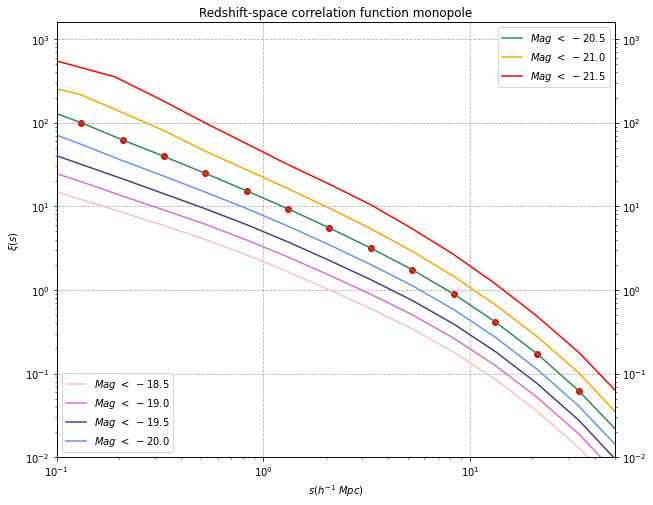

In [151]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)


# colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red','chocolate']
colors = ['pink','orchid','darkslateblue','cornflowerblue','seagreen','orange','red']
l = [[]for _ in range(7)]

for i in range(4):
    y = xi_mo[i]['xi0'] /  (10**(0.15*(4-i)))
    l[i], = plt.plot(xi_mo[i]['s'],y,color = colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[0],l[1],l[2],l[3]],loc = 'lower left')


plt.plot(xi_mo[4]['s'],xi_mo[4]['xi0'],'ro')
plt.xscale('log')
plt.yscale('log')
plt.grid(axis = 'both', linestyle = '--')
plt.xlim(0.1,50)
plt.ylim(0.01,10**3.2)
plt.xlabel('$s (h^{-1} \ Mpc)$')
plt.ylabel(r'$\xi(s)$')



ax2 = ax1.twinx()
for i in range(4,7):
    y = xi_mo[i]['xi0'] * (10**(0.15*(i - 4)))
    l[i], = plt.plot(xi_mo[i]['s'],y,colors[i],label = '$Mag \ <\ -%s$'%(18.5+0.5*i))
plt.legend(handles = [l[4],l[5],l[6]],loc = 'upper right')

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.1,50)
plt.ylim(0.01,10**3.2)
# plt.xlabel('$r_p (h^{-1} \ Mpc)$')
# plt.ylabel('$W_p (r_{p})$')
plt.title('Redshift-space correlation function monopole')
plt.savefig('/home/yunzheng/mock/clustering/picture/ximomopole.pdf',dpi = 100)

In [45]:
savg['DD']

array([      0,       0,       0, ..., 1483218, 1493650, 1506146],
      dtype=uint64)

In [44]:
savg['DR']

array([       0,        0,        0, ..., 14963325, 15016310, 15116544],
      dtype=uint64)

In [47]:
savg['RR']

0

In [52]:
savg['DDsavg']

(9900,)

In [50]:
savg['DRsavg']

array([ 0.        ,  0.        ,  0.        , ..., 60.49970203,
       60.50017704, 60.50021153])

In [51]:
savg['RRsavg']

array([ 0.        ,  0.        ,  0.        , ..., 60.50025576,
       60.50010196, 60.50036555])

In [28]:
dat = np.array([18.5,19,19.5,20,20.5,21,21.5,22])
dat = -dat

In [29]:
dat

array([-18.5, -19. , -19.5, -20. , -20.5, -21. , -21.5, -22. ])